# Clustering

Clustering is an unsupervised learning technique that divides the entire dataset into groups, or clusters, based on patterns in the data.

**K-means algorithm**

K-means clustering is one of the simplest and most popular machine learning algorithms. K-means groups the data into a defined number (k) of clusters.   
k-means algorithm:

1. Specify the number of clusters k
2. Select k random points from the data as the initial centroids
3. Allocate all other points to the nearest cluster centroid
4. Recompute the centroids of the new clusters
5. Repeat steps 3 and 4, until either:
    -  the centroids have stabilized (don't change between interations) or
    - the maximum number of iterations have completed

## Import Libraries & Read In Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
import plotly.graph_objs as go
import seaborn as sns

In [2]:
processed_df = pd.read_csv('../data/processed.csv', index_col=0)
processed_df.head()                        

Study  PayScheme    Trials  FreqGoodDecks  AhaMoment  \
Subj_1  Fridberg          1 -0.698836       1.421697  -1.982720   
Subj_2  Fridberg          1 -0.698836      -0.412875   0.962299   
Subj_3  Fridberg          1 -0.698836      -0.223092  -0.351633   
Subj_4  Fridberg          1 -0.698836      -0.096570  -0.351633   
Subj_5  Fridberg          1 -0.698836       0.599302  -0.532865   

        CumOutTrial95    NetOut  
Subj_1       1.248889  1.044988  
Subj_2      -0.361638 -0.414346  
Subj_3      -0.427824 -0.474318  
Subj_4      -0.229266 -0.294400  
Subj_5       0.322284  0.205371

## Determine Number of Clusters

To choose an appropiate number of clusters, we will use two common methods, the Elbow Method and the Silhouette Coefficient. 

### The Elbow Method

Involves running several k-means, incrementing k with each iteration, and note the Sum of the Squared Error (SSE) each time.

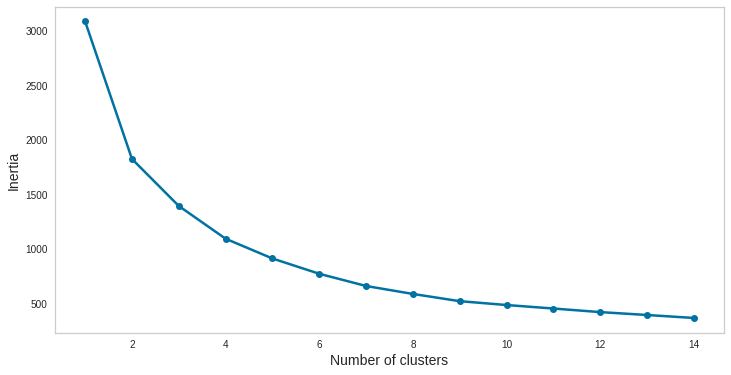

In [3]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,15):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state=42)
    kmeans.fit(processed_df.iloc[:,2:])
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o', lw=2.5)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('Inertia', fontsize = 14)
plt.grid()
plt.show()

Inertia decreases as the number of clusters increase. We're looking for the sweet spot (elbow point) where the curve starts to bend. Here, the elbow looks to be located at k = 2.

**Confirm Elbow using kneed**

In [4]:
kl = KneeLocator(range(1, 15), SSE, curve="convex", direction="decreasing")
print('Elbow at k = ' + str(kl.elbow))

Elbow at k = 4


### The Silhouettee coefficient

Measures how close each data point in one cluster is to data points in neighbouring clusters. 

The formula for the Silhouette score, S, is:
$$
  S = \frac{b-a}{max(a,b)}
$$
Where:
- the mean distance between the observation and all other data points in the same cluster (i.e., intra-cluster distance) is denoted by **a**, and
- The mean distance between the observation and all other data points of the next nearest cluster (mean nearest-cluster distance) is denoted by **b**.

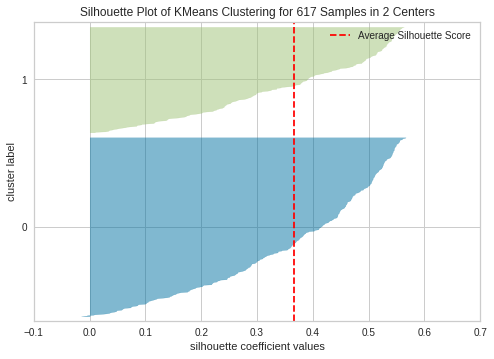

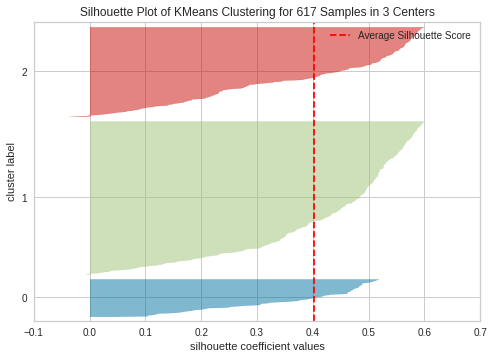

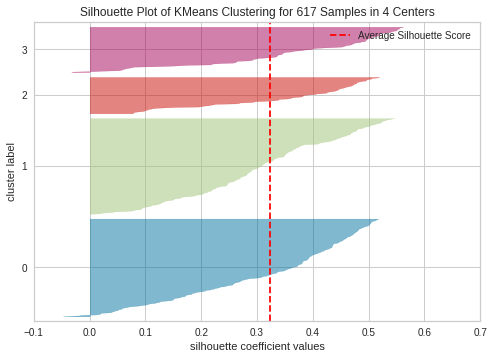

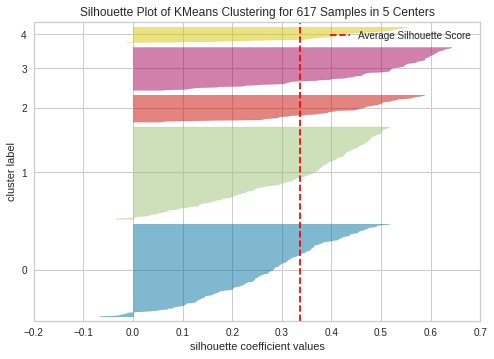

In [5]:
for cluster in range(2,6):
    
    kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state=42)

    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(processed_df.iloc[:,2:])
    visualizer.show()


In [6]:
# optimal from this seems to be 3, so some comment about how many clusters to pick

## K-means

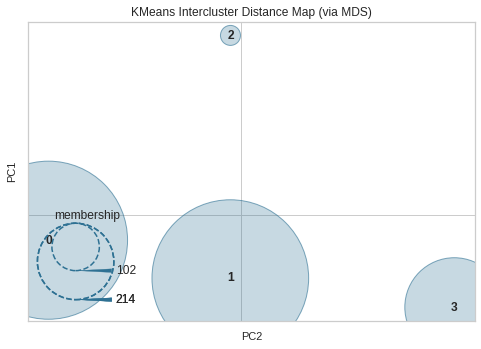

InterclusterDistance(ax=<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=KMeans(n_clusters=4, random_state=42),
                     random_state=12)

In [7]:
from yellowbrick.cluster import intercluster_distance

kmeans = KMeans(n_clusters = 4, init='k-means++', random_state=42)
intercluster_distance(kmeans, 
                      processed_df.iloc[:,2:], 
                      embedding='mds', 
                      random_state=12) # other option for embedding 'tsne'

## KMeans on Original Dataset

In [8]:
kmeans_orig = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(processed_df.iloc[:,2:])
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(processed_df.iloc[:,2:], kmeans_orig.labels_, metric='euclidean')))
labels_orig = kmeans_orig.labels_
clusters_orig = pd.concat([processed_df.iloc[:,2:], pd.DataFrame({'cluster':labels_scale}, index=processed_df.index)], axis=1)

KMeans Scaled Silhouette Score: 0.3220845845585689


NameError: name 'labels_scale' is not defined

In [121]:
clusters_orig

Trials  FreqGoodDecks  AhaMoment  CumOutTrial95    NetOut  cluster
Subj_1  -0.698836       1.421697  -1.982720       1.248889  1.044988        3
Subj_2  -0.698836      -0.412875   0.962299      -0.361638 -0.414346        1
Subj_3  -0.698836      -0.223092  -0.351633      -0.427824 -0.474318        0
Subj_4  -0.698836      -0.096570  -0.351633      -0.229266 -0.294400        0
Subj_5  -0.698836       0.599302  -0.532865       0.322284  0.205371        0
...           ...            ...        ...            ...       ...      ...
Subj_94  2.299267      -0.975899   0.849029      -0.163080  0.365298        2
Subj_95  2.299267       1.307827   0.010831       1.425385  1.844623        2
Subj_96  2.299267       1.267761   0.327987       1.293013  1.284878        2
Subj_97  2.299267       0.546585  -0.170401      -0.118956  1.084970        2
Subj_98  2.299267      -1.857337   0.962299      -1.575049 -1.313935        2

[617 rows x 6 columns]

/home/niamh/anaconda3/envs/jupbook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



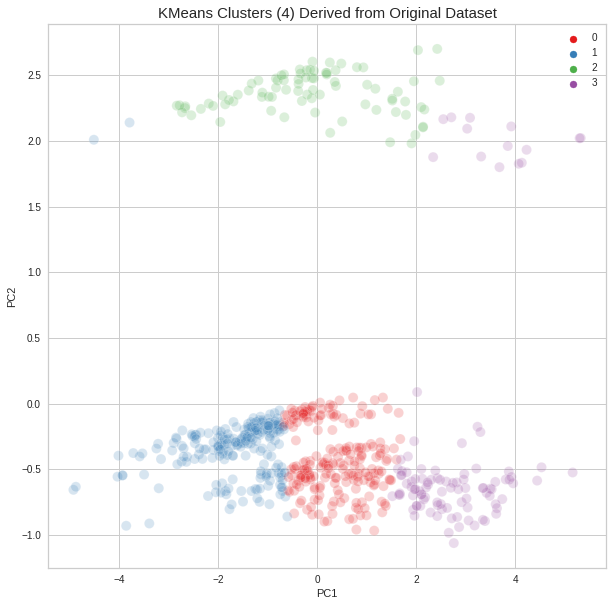

In [125]:
pca2 = PCA(n_components=3).fit(processed_df.iloc[:,2:])
pca2d = pca2.transform(processed_df.iloc[:,2:])
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=labels_orig, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [35]:
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
labels = labels_scale
trace = go.Scatter3d(x=pca2d[:,0], y=pca2d[:,1], z=pca2d[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

## KMeans on Principal Components

Prinicipal component analysis (PCA) is a method to reduce the dimensionality of a dataset. PCA retains most of the variance (typically 90%) of information from the original high-dimensional dataset, despite reducing the dimensionality. The information from the original features are "squeezed" into principal components (PCs). 2-3 PCs are usually chosen, as humans cannot visualize anything above 3 features.

### Determine Optimal Number of PCs

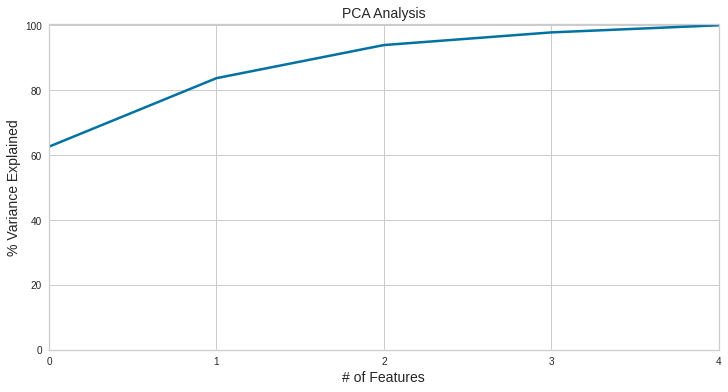

In [47]:
#n_components=5 because there are 5 features that can be clustered on in processed_df
pca = PCA(n_components=5)
pca.fit(processed_df.iloc[:,2:])
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
plt.ylabel('% Variance Explained', fontsize = 14)
plt.xlabel('# of Features', fontsize = 14)
plt.title('PCA Analysis', fontsize = 14)
plt.xlim(0,4)
ax.xaxis.set_ticks(np.arange(0, 5, 1))
plt.ylim(0,100.5)
plt.plot(var, lw=2.5)
plt.show()

The above plot shows the amount of variance each PC retains. The first 2 PCs encompass approximately 94% of the variance, while the first 3 PCs empompass approximately 98%. 94% is satisfactory, so we'll stick to 2 PCs.

### Feature reduction using PCA

In [152]:
pca = PCA(n_components=3)
pca_scale = pca.fit_transform(processed_df.iloc[:,2:])
pca_df = pd.DataFrame(pca_scale, columns=['pc1','pc2','pc3'])
pca_df.head()

pc1       pc2       pc3
0  2.760987 -1.060219  0.538870
1 -1.070650 -0.460486 -0.671823
2 -0.461061 -0.834861  0.392381
3 -0.199770 -0.806425  0.255872
4  0.785414 -0.791316  0.054710

### Determine Number of Clusters

We once again need to determine a suitable number of clusters, this time for the reduced PCA dataframe. We'll repeat both the Elbow Method and calculate the Silhouette Coefficient.

**Elbow Method**

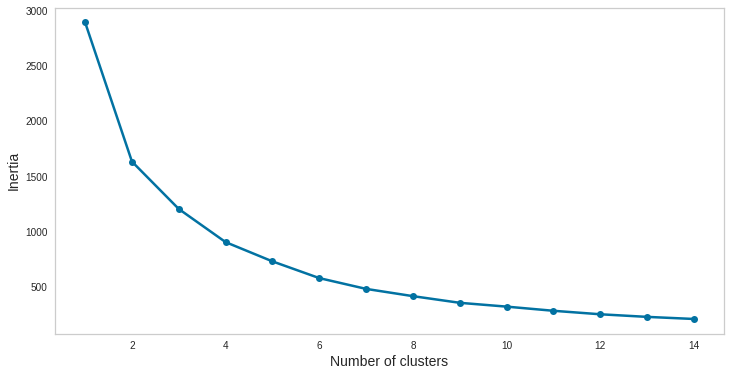

In [153]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,15):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state=42)
    kmeans.fit(pca_df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o', lw=2.5)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('Inertia', fontsize = 14)
plt.grid()
plt.show()

In [154]:
kl = KneeLocator(range(1, 15), SSE, curve="convex", direction="decreasing")
print('Elbow at k = ' + str(kl.elbow))

Elbow at k = 4


**Silhouette Coefficient**

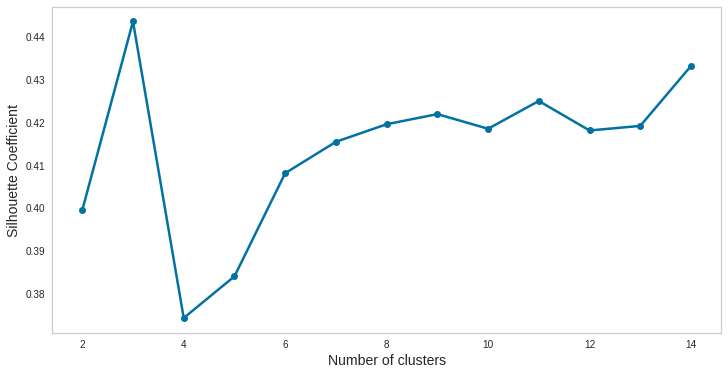

In [155]:
silhouette_coefs = []
for cluster in range(2,15):
    
    kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state=42)
    kmeans.fit(pca_df)
    silhouette_coef = silhouette_score(pca_df, kmeans.predict(pca_df))
    silhouette_coefs.append(silhouette_coef)


# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(2,15), 'sil_co':silhouette_coefs})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['sil_co'], marker='o', lw=2.5)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('Silhouette Coefficient', fontsize = 14)
plt.grid()
plt.show()

**Kmeans**

In [173]:
kmeans_pca = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df)
labels_pca = kmeans_pca.labels_
clusters_pca = pd.concat([pca_df, pd.DataFrame({'pca_clusters':labels_pca})], axis=1)

/home/niamh/anaconda3/envs/jupbook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



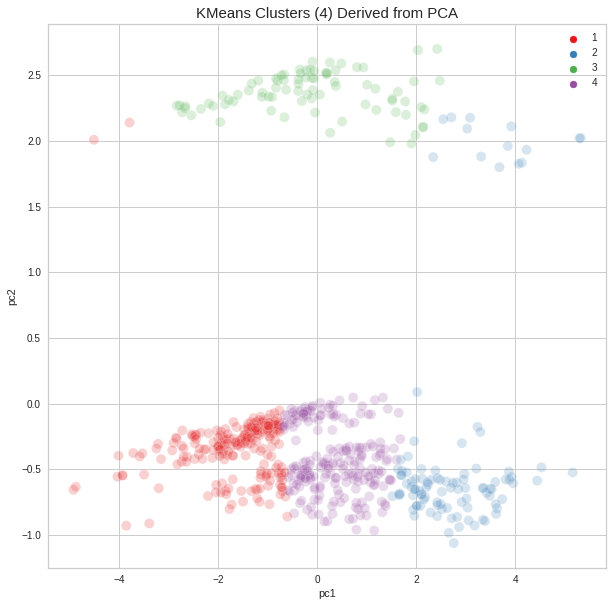

In [174]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca.iloc[:,0],clusters_pca.iloc[:,1], hue=labels_pca+1, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from PCA', fontsize=15)
plt.legend()
plt.show()

/home/niamh/anaconda3/envs/jupbook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



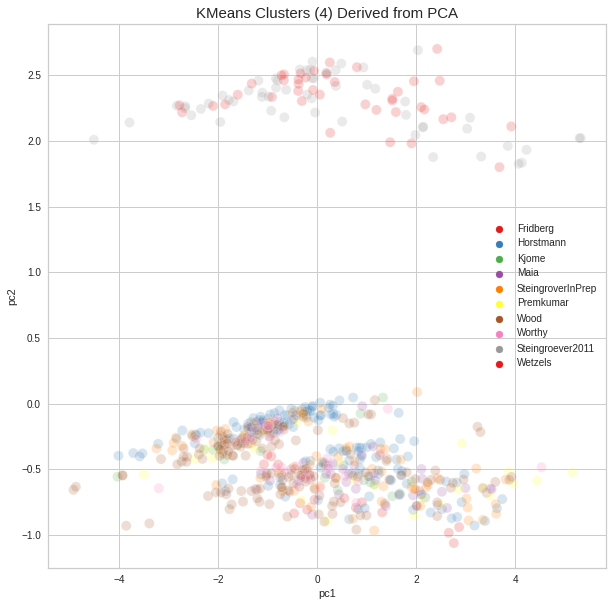

In [130]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca.iloc[:,0],clusters_pca.iloc[:,1], hue=processed_df.reset_index().Study, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from PCA', fontsize=15)
plt.legend()
plt.show()

/home/niamh/anaconda3/envs/jupbook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



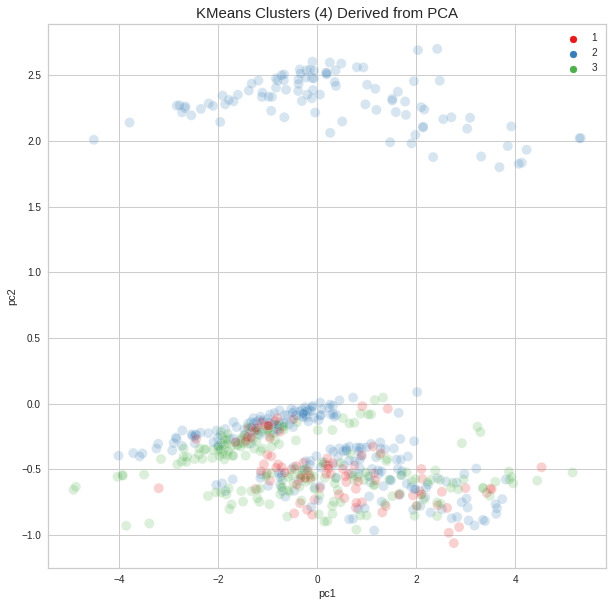

In [131]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca.iloc[:,0],clusters_pca.iloc[:,1], hue=processed_df.reset_index().PayScheme, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from PCA', fontsize=15)
plt.legend()
plt.show()

In [98]:
processed_df

Study  PayScheme    Trials  FreqGoodDecks  AhaMoment  \
Subj_1   Fridberg          1 -0.698836       1.421697  -1.982720   
Subj_2   Fridberg          1 -0.698836      -0.412875   0.962299   
Subj_3   Fridberg          1 -0.698836      -0.223092  -0.351633   
Subj_4   Fridberg          1 -0.698836      -0.096570  -0.351633   
Subj_5   Fridberg          1 -0.698836       0.599302  -0.532865   
...           ...        ...       ...            ...        ...   
Subj_94   Wetzels          2  2.299267      -0.975899   0.849029   
Subj_95   Wetzels          2  2.299267       1.307827   0.010831   
Subj_96   Wetzels          2  2.299267       1.267761   0.327987   
Subj_97   Wetzels          2  2.299267       0.546585  -0.170401   
Subj_98   Wetzels          2  2.299267      -1.857337   0.962299   

         CumOutTrial95    NetOut  
Subj_1        1.248889  1.044988  
Subj_2       -0.361638 -0.414346  
Subj_3       -0.427824 -0.474318  
Subj_4       -0.229266 -0.294400  
Subj_5        0.322284  0.205371  
...                ...       ...  
Subj_94      -0.163080  0.365298  
Subj_95       1.425385  1.844623  
Subj_96       1.293013  1.284878  
Subj_97      -0.118956  1.084970  
Subj_98      -1.575049 -1.313935  

[617 rows x 7 columns]

In [90]:
processed_df[['Study']].reset_index(drop=True)

Study
0    Fridberg
1    Fridberg
2    Fridberg
3    Fridberg
4    Fridberg
..        ...
612   Wetzels
613   Wetzels
614   Wetzels
615   Wetzels
616   Wetzels

[617 rows x 1 columns]

In [75]:
clusters_pca

pc1       pc2  pca_clusters
0    2.760987 -1.060219             0
1   -1.070650 -0.460486             1
2   -0.461061 -0.834861             3
3   -0.199770 -0.806425             3
4    0.785414 -0.791316             3
..        ...       ...           ...
612 -0.666004  2.505108             2
613  2.476958  2.457342             2
614  1.956087  2.453357             2
615  0.976398  2.277580             2
616 -2.774054  2.270188             2

[617 rows x 3 columns]

In [148]:
pd.DataFrame(labels_orig).value_counts()

0    216
1    215
3    104
2     82
dtype: int64

In [150]:
pd.DataFrame(labels_pca).value_counts()

3    228
1    200
0    107
2     82
dtype: int64

In [185]:
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
labels = labels_pca
trace = go.Scatter3d(x=clusters_pca.pc1, y=clusters_pca.pc2, z=clusters_pca.pc3, mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [145]:
pd.DataFrame(labels_orig == labels_pca).value_counts()

False    330
True     287
dtype: int64

In [156]:
kmeans_pca = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df)
labels_pca = kmeans_pca.labels_
clusters_pca = pd.concat([pca_df, pd.DataFrame({'pca_clusters':labels_pca})], axis=1)

In [167]:
clusters_pca

pc1       pc2       pc3  pca_clusters
0    2.760987 -1.060219  0.538870             1
1   -1.070650 -0.460486 -0.671823             0
2   -0.461061 -0.834861  0.392381             3
3   -0.199770 -0.806425  0.255872             3
4    0.785414 -0.791316  0.054710             3
..        ...       ...       ...           ...
612 -0.666004  2.505108 -0.129124             2
613  2.476958  2.457342 -0.447807             2
614  1.956087  2.453357 -0.465218             2
615  0.976398  2.277580  0.594908             2
616 -2.774054  2.270188  0.872416             2

[617 rows x 4 columns]